 ### The aim of this data analytics project is to perform customer segmentation analysis for an e
### commerce company. By analyzing customer behavior and purchase patterns, the goal is to
### group customers into distinct segments. This segmentation can inform targeted marketing
### strategies, improve customer satisfaction, and enhance overall business strategies

### Import necessary libraries to perform function like numeric, visualization, Data Manipulations, calculate the Point-Biserial Correlation Coefficient and its p-value.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import seaborn as sns

In [29]:
data = pd.read_csv("C:/Users/kingzuzu/Documents/Execl workshheet/Project 2.csv")


## Reading the Data

In [31]:

data

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,4/10/2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11/6/2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,6/5/2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,9/2/2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,9/10/2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,1/1/2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,6/4/2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


## Taking a look at the top 5 rows of the data

In [32]:

data.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,4/10/2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11/6/2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,6/5/2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,9/2/2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,9/10/2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


##  Access the column labels of a DataFrame

In [5]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

## Looking for missing value

In [33]:

data.isna().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

## Checking for column type

In [35]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

## Assessing unique value

In [36]:

data.nunique()

Customer ID                           40259
Age                                      53
Gender                                    2
Marital Status                            5
Education Level                           5
Geographic Information                   35
Occupation                                9
Income Level                          42779
Behavioral Data                           5
Purchase History                       2016
Interactions with Customer Service        5
Insurance Products Owned                  5
Coverage Amount                       51765
Premium Amount                         4460
Policy Type                               4
Customer Preferences                      5
Preferred Communication Channel           5
Preferred Contact Time                    5
Preferred Language                        5
Segmentation Group                        5
dtype: int64

## Calculate average purchase value (APV)

In [37]:

average_purchase_value = data['Income Level'].mean()
print( data['Income Level'].mean() )

82768.32431826253


## Calculate the Total Revenue

In [38]:

total_revenue = data['Income Level'].sum()
print(data['Income Level'].sum() )


4428353656


##  Frequency of Purchases 

In [47]:
 
frequency_of_purchases = data.groupby("Customer ID").size()
print(data.groupby("Customer ID").size() )

Customer ID
1         34
5          1
23         1
37         1
49         1
          ..
99772      1
99891      1
99962      1
99988      1
100000    15
Length: 40259, dtype: int64


## Unique Customer

In [48]:

unique_customers = data['Customer ID'].nunique()
print(data['Customer ID'].nunique() )


40259


##  Purchase History  in datetime format

In [50]:

data['Purchase History'] = pd.to_datetime(data['Purchase History'], errors='coerce')

# Drop rows with invalid dates 
data = data.dropna(subset=['Purchase History'])

# Calculate the time span
time_span = (data['Purchase History'].max() - data['Purchase History'].min()).days
print ((data['Purchase History'].max() - data['Purchase History'].min()).days )


2187


## The elbow method suggests using 3 clusters for segmentation, While the clusters indicate customer segmentation based on income and purchase behavior, which can be useful for marketing, customer targeting, and business decision-making. while neccessary libraries was imported 

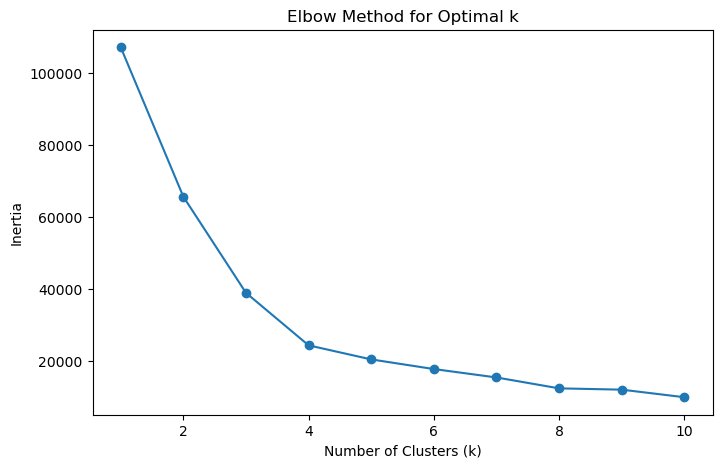

          Income Level  PurchaseValue
Cluster                              
0         80402.652280    1500.919220
1         51716.938780    3849.277962
2        118809.566383    3744.541097


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check for necessary columns
if 'Income Level' in data.columns and 'Premium Amount' in data.columns:
    # Rename for consistency
    data.rename(columns={'Premium Amount': 'PurchaseValue'}, inplace=True)
    
    # Step 1: Select features for clustering
    features = data[['Income Level', 'PurchaseValue']]
    
    # Step 2: Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Step 3: Determine the optimal number of clusters using the Elbow Method
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    
    # Step 4: Fit K-means with the chosen number of clusters (e.g., k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_features)
    
    # Step 5: Analyze clusters
    cluster_analysis = data.groupby('Cluster')[['Income Level', 'PurchaseValue']].mean()
    print(cluster_analysis)
else:
    print("The required columns 'Income Level' and 'Premium Amount' are not in the dataset.")



Exploration of Clusters¶
In this section:

Visualisation of clusters
 3D customer segments.
Purchase value Distribution by cluster
Cluster comparsion. Average values
customer segementation ( Scatter Plot)

### This 3D plot shows how customers are grouped into three distinct segments (shown in purple, teal, and yellow) based on their income level, purchase value, and coverage amount. The clear separation between colors indicates well-defined customer groups with different buying patterns and financial profiles, which helps businesses understand their customer base and create targeted marketing strategies.

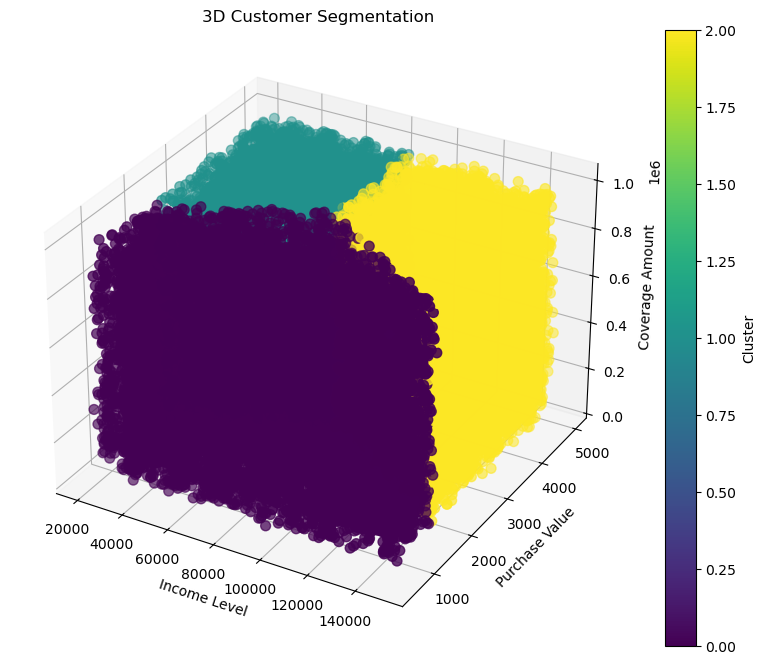

In [16]:
# 3D Scatter Plot: Visualize Clusters (Optional if 3 Features)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    data['Income Level'], 
    data['PurchaseValue'], 
    data['Coverage Amount'], 
    c=data['Cluster'], 
    cmap='viridis', 
    s=50
)
ax.set_title('3D Customer Segmentation')
ax.set_xlabel('Income Level')
ax.set_ylabel('Purchase Value')
ax.set_zlabel('Coverage Amount')
plt.colorbar(sc, label='Cluster')
plt.show()

### This box plot reveals three distinct customer spending groups: Cluster 0 shows lower spenders with purchase values around $1,500, while   Clusters     and 2 represent   higher   spenders with   median purchases   around  $4,000. The clear separation between low and high spenders, along with the varying spreads of purchase values in each cluster, helps businesses understand their customer spending patterns and tailor their strategies accordingly.

C:\Users\kingzuzu\AppData\Local\Temp\ipykernel_10196\3882803616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PurchaseValue', data=data, palette='viridis')


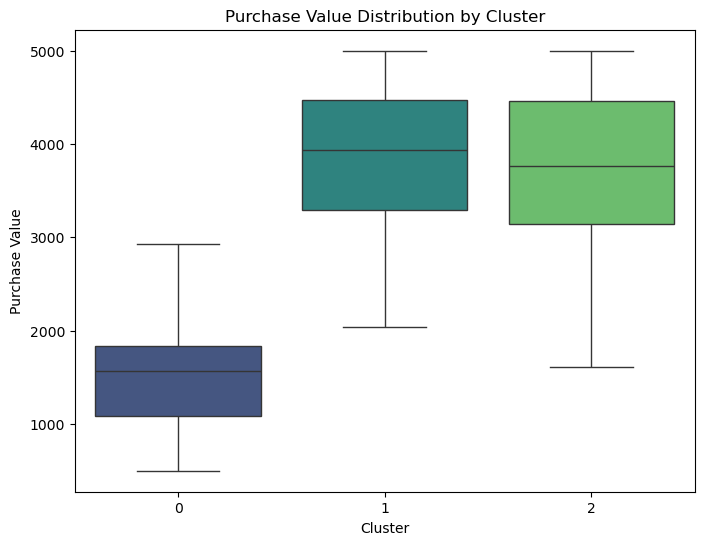

In [28]:
# Box Plot: Distribution of Purchase Value by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='PurchaseValue', data=data, palette='viridis')
plt.title('Purchase Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Value')
plt.show()

### This bar graph compares three key features (Income Level, Purchase Value, and Coverage Amount) across three customer clusters. Each cluster shows notably different patterns: Cluster 2 has the highest income levels, while Clusters 0 and 1 have higher coverage amounts. Purchase values remain relatively small across all clusters. This visualization effectively shows how these three characteristics vary among different customer segments, helping identify unique customer group behaviors.

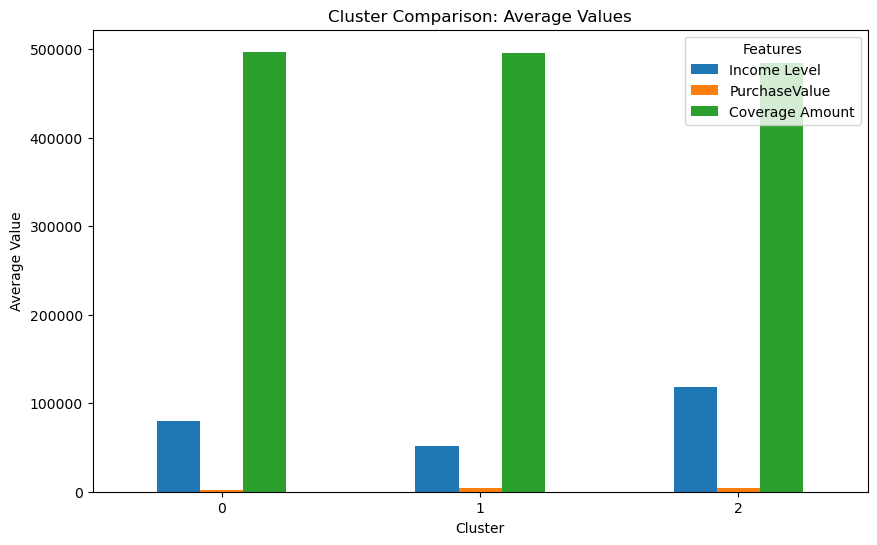

In [22]:
# Bar Chart: Average Values per Cluster
cluster_means = data.groupby('Cluster')[['Income Level', 'PurchaseValue', 'Coverage Amount']].mean()
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Comparison: Average Values')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.show()

### This scatter plot visualizes customer segmentation by comparing Income Level (x-axis) and Purchase Value (y-axis), with three distinct clusters shown in different colors: purple (Cluster 0), teal (Cluster 1), and yellow (Cluster 2). The data shows clear patterns where each cluster occupies a specific region of the plot - Cluster 0 covers lower purchase values across all income levels, while Clusters 1 and 2 represent higher purchase values but are separated by income levels (Cluster 1 for lower incomes, Cluster 2 for higher incomes). This clear separation indicates well-defined customer segments with distinct spending and income characteristics.

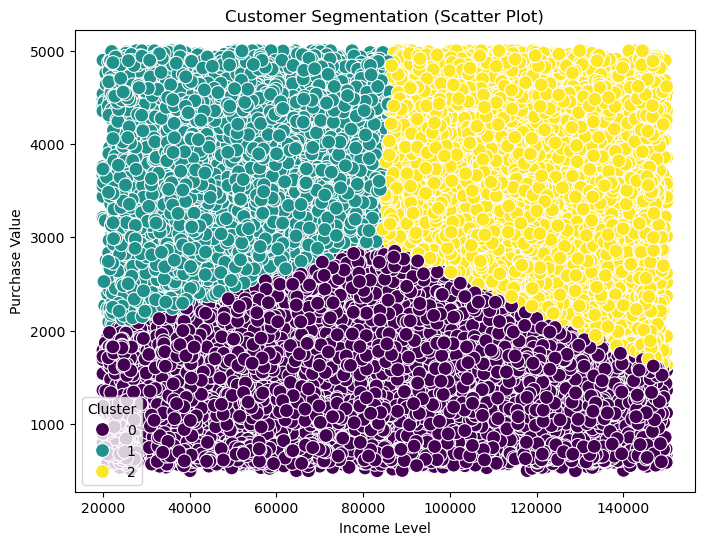

In [26]:
# Scatter Plot: Visualize Clusters (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Income Level'], 
    y=data['PurchaseValue'], 
    hue=data['Cluster'], 
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation (Scatter Plot)')
plt.xlabel('Income Level')
plt.ylabel('Purchase Value')
plt.legend(title='Cluster')
plt.show()

Result

This section contains the results of the k- means clustering analysis, which aimed to identify distinct cudstomer segements based on behaviour and purchase patterns. the analysis utilized "Purchase Value and Income Level" features


Cluster Characteristics¶

Cluster 0: Low Income, Low Spending

Insights:
Customers in this group have limited purchasing power. They opt for minimal coverage plans and make smaller purchases.


Recommendations:
Offer budget-friendly packages or flexible payment plans.
Use targeted promotions (e.g., discounts, referral bonuses).

Cluster 1: Moderate Income, Moderate Spending

Insights:
This is a middle-tier segment, showing steady spending patterns and average income levels. They are a potential growth audience.

Recommendations:
Create loyalty programs to increase retention.
Offer mid-tier coverage plans with value-added services.

Cluster 2: High Income, High Spending

Insights:
1. These are premium customers with high spending power. 
2. They value premium services and are less price-sensitive.

Recommendations:
1. Focus on personalized offers and premium features.
2. Use exclusive services to strengthen relationships (e.g., priority support, tailored policies).